In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from os import listdir
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def Cargar_img(directorio: str, img_size: tuple[int, int], color_mode: str):

    X, y = [], []
    class_names = listdir(directorio)
    for i, img_fold in enumerate(class_names):

        images_path = listdir(os.path.join(directorio, img_fold))
        y.extend([i]*len(images_path))
        for img_name in images_path:
            image = tf.keras.utils.load_img(
                os.path.join(directorio, img_fold, img_name),
                color_mode = color_mode,
                target_size= img_size,
                interpolation="nearest",
                keep_aspect_ratio=False,
            )

            image = tf.keras.utils.img_to_array(image, data_format="channels_last").astype(np.uint8)

            X.append(image)

    print("clases encontradas:", class_names)
    X = np.array(X)
    y = np.array(y)

    i = np.arange(0, y.shape[0])
    np.random.shuffle(i)

    return X[i], y[i]

In [4]:
X, y = Cargar_img(
    directorio = "/content/drive/MyDrive/imágenes/Imágenes",
    img_size = (128,128),
    color_mode = "rgb"
)

clases encontradas: ['cats', 'panda', 'dogs']


In [5]:
clases = ['cats', 'panda', 'dogs']

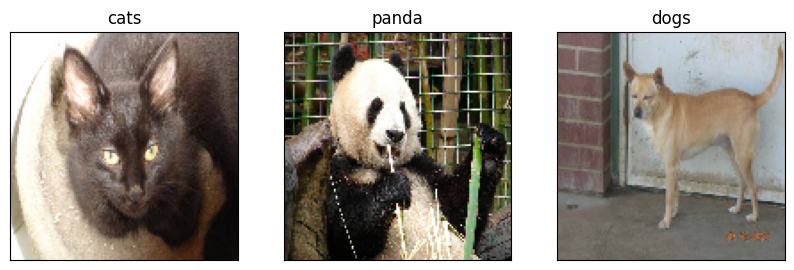

In [6]:
_, axes = plt.subplots(1, 3, figsize=(10,10))
for i in range(len(clases)):
    axes[i].imshow(X[ y == i ][0])
    axes[i].set_title(clases[i])

    axes[i].xaxis.set_tick_params(labelbottom=False)
    axes[i].yaxis.set_tick_params(labelleft=False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()

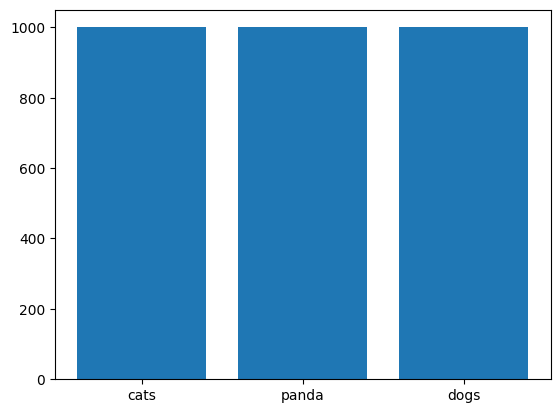

In [7]:
plt.figure()

plt.bar(clases, np.bincount(y))

plt.show()

In [8]:
X_scaled = X / 255

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, stratify=y)

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128,128,3)),
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(128, 128, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

modelo.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      29,491,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,515,075 (112.59 MB)

 Trainable params: 29,513,859 (112.59 MB)

 Non-trainable params: 1,216 (4.75 KB)

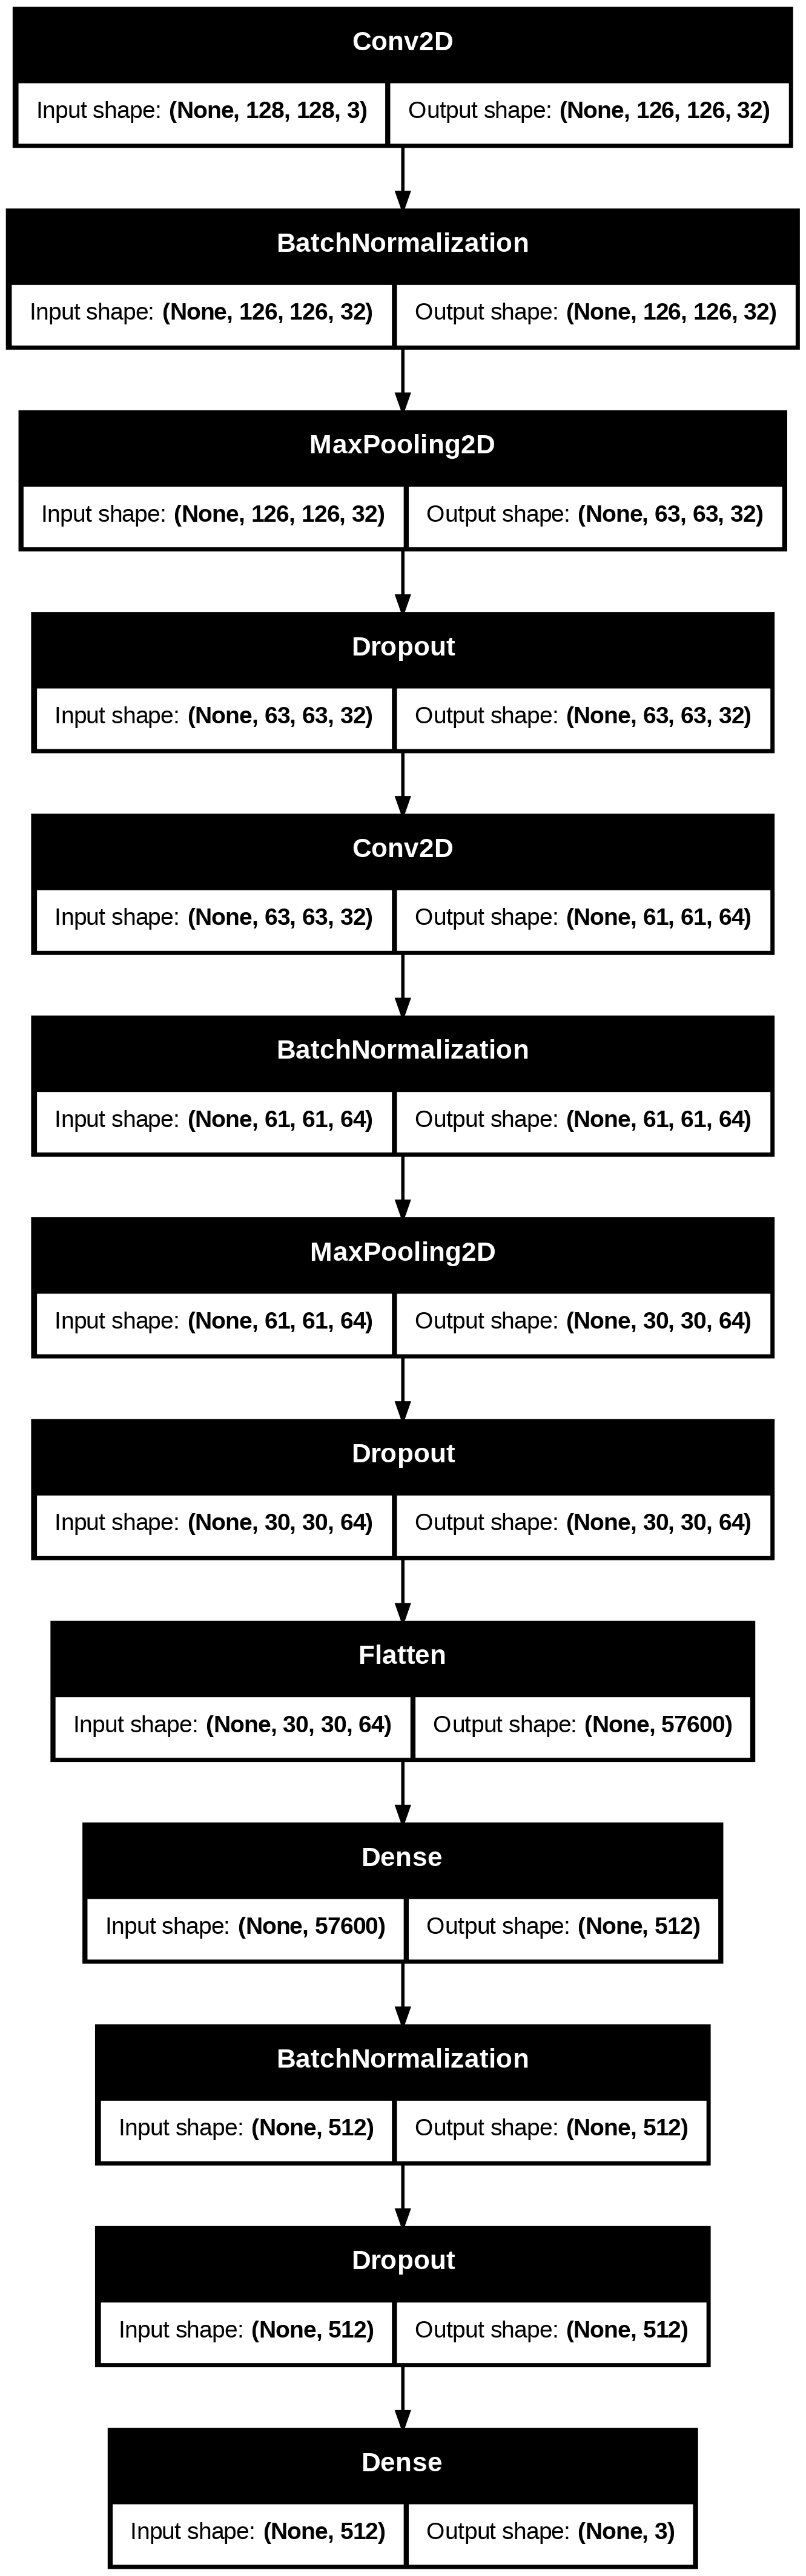

In [ ]:
tf.keras.utils.plot_model(modelo, show_shapes=True)

In [ ]:
train_data_augmenter = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 45,    # rotar imagenes hasta 45 grados aleatoriamente
    shear_range=0.2,        # mover la imagen para formar un paralelogramo, hasta en un 20% aleatoriamente
    zoom_range=0.2,         # aplicar zoom hasta del 20% aleatoriamente
    horizontal_flip=True,   # rotar horizontalmente la imagen aleatoriamente
    validation_split=0.25   # fraccion de las imagenes que seran usadas para validar el modelo
)

In [ ]:
# Compilacion
modelo.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
CB = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)
]

# Entrenamiento
history = modelo.fit(
    train_data_augmenter.flow(X_train, y_train, subset="training"),
    validation_data = train_data_augmenter.flow(X_train, y_train, subset="validation"),
    epochs = 60,
    callbacks = CB,
    batch_size = 32,
    validation_batch_size = 32
)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 318ms/step - accuracy: 0.5160 - loss: 1.9485 - val_accuracy: 0.3150 - val_loss: 3.6331
Epoch 2/60
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.6015 - loss: 1.0901 - val_accuracy: 0.3150 - val_loss: 2.8902
Epoch 3/60
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.6752 - loss: 0.8132 - val_accuracy: 0.3150 - val_loss: 2.9412
Epoch 4/60
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - accuracy: 0.6859 - loss: 0.7423 - val_accuracy: 0.3150 - val_loss: 3.3689
Epoch 5/60
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.6650 - loss: 0.7754 - val_accuracy: 0.3233 - val_loss: 2.5394
Epoch 6/60
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.6568 - loss: 0.7797 - val_accuracy: 0.3283 - val_loss: 2.3566
Epoch 7/60
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.6592 - loss: 0.7558 - val_accuracy: 0.5517 - val_loss: 1.0133
Epoch 8/60
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.6643 - loss: 0.6991 - val_accuracy: 0.4500

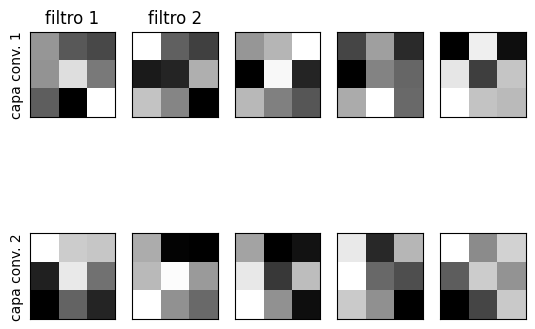

In [ ]:
# filtrar capas convolucionales
conv_layers = [layer for layer in modelo.layers if "conv" in layer.name ]

np.random.seed(1)

_, axes = plt.subplots(len(conv_layers), 5)

for i, layer in enumerate(conv_layers):
    axes[i,0].set_ylabel(f"capa conv. {i+1}")
    axes[0,i].set_title(f"filtro {i+1}")

    # obtener los filtros de cada capa convolucional
    filters, biases = layer.get_weights()
    # reescalar filtros para poder ser visualizados
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # obtener 4 filtros al azar para ser visualizados
    sel = np.random.randint(0, filters.shape[-1], 5)
    filters_selected = filters[:,:,:, sel]
    filters_selected = np.moveaxis(filters_selected, -1, 0)
    filters_selected = np.mean(filters_selected, axis=3, keepdims=True)
    # filters_selected = filters_selected[:,:,:,0]
    for j, filter in enumerate(filters_selected):
        # visualizar filtro
        axes[i,j].imshow(filter, cmap="gray")

        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step


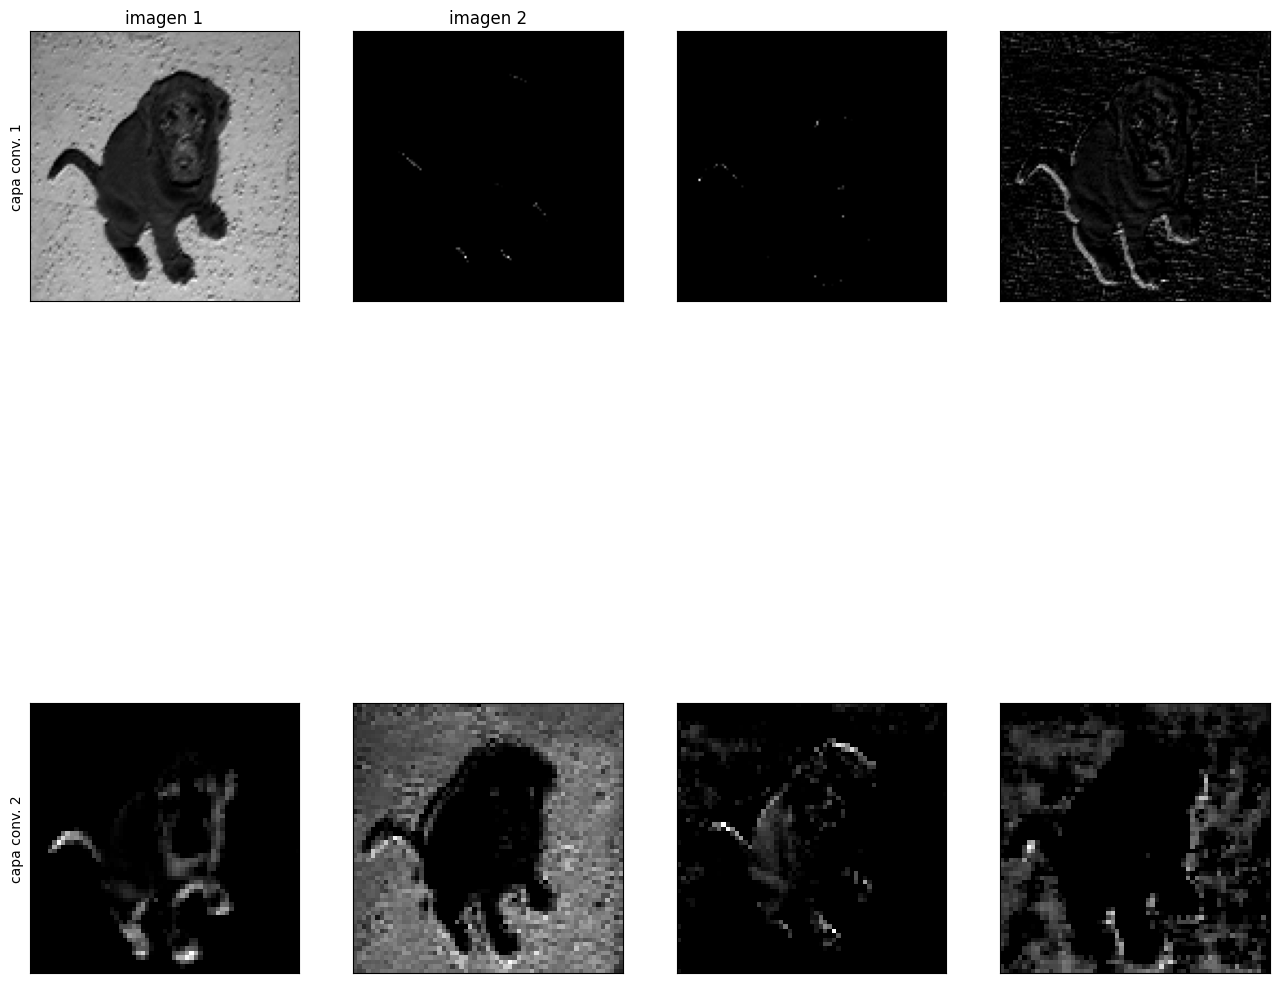

In [ ]:
_, axes = plt.subplots(len(conv_layers), 4, figsize=(16,16))

np.random.seed(3)

# modelo que nos dara la salida de cada capa convolucional
vis_model = tf.keras.models.Model(
    inputs = modelo.inputs,
    outputs = [ layer.output for layer in conv_layers ]
)

# aplicar el modelo hasta cada capa convolucional
feature_maps = vis_model.predict(np.expand_dims(X_test[40], axis=0))

for i, f_map in enumerate(feature_maps):
    axes[i,0].set_ylabel(f"capa conv. {i+1}")
    axes[0,i].set_title(f"imagen {i+1}")

    # filtrar imagenes resultantes sin caracteristicas extraidas
    f_map = f_map[:,:,:, np.any(f_map[0,:,:,:] > 0, axis=(0,1)) ]

    # seleccionar 4 imagenes con el filtro aplicado para mostrar
    sel = np.random.randint(0, f_map.shape[-1], 4)
    feature_map_selected = f_map[:,:,:, sel]
    feature_map_selected = feature_map_selected[0]
    feature_map_selected = np.moveaxis(feature_map_selected, -1, 0)
    for j, image in enumerate(feature_map_selected):
        # visualizar imagen
        axes[i,j].imshow(image, cmap="gray")

        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

plt.show()

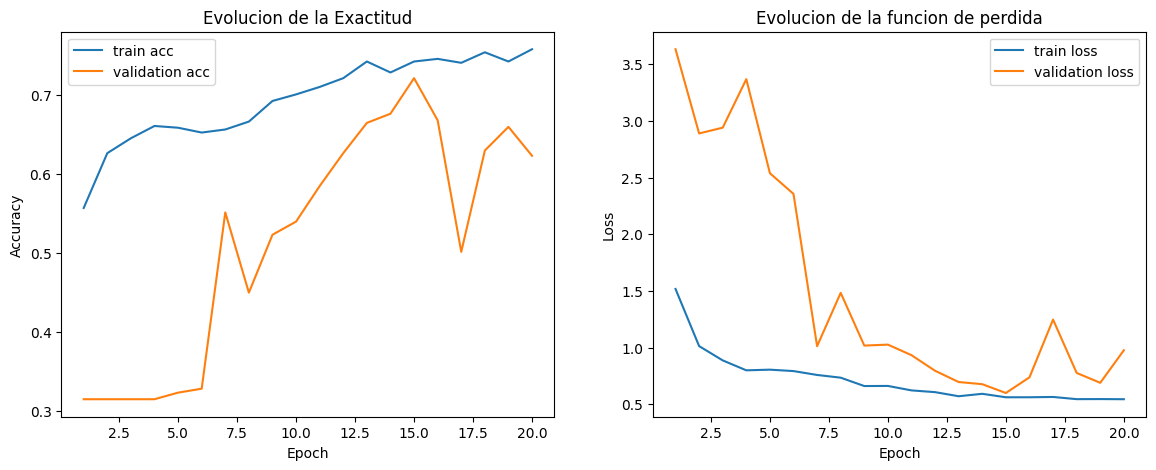

In [ ]:
# graficas de la evolucion del acurracy y loss
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

history = history.history
epochs = range(1, len(history["accuracy"]) + 1)

# plot acurracy
ax1.plot(epochs, history["accuracy"], label="train acc")
ax1.plot(epochs, history["val_accuracy"], label="validation acc")

ax1.legend()
ax1.set_title("Evolucion de la Exactitud")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")


# plot loss
ax2.plot(epochs, history["loss"], label="train loss")
ax2.plot(epochs, history["val_loss"], label="validation loss")

ax2.legend()
ax2.set_title("Evolucion de la funcion de perdida")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")

plt.show()

In [ ]:
import numpy as np
def plot_imagen_classification(modelo, imagen, clases, y_true=None):
    if len(imagen.shape) == 3:
        imagen = np.expand_dims(imagen, axis=0)

    predictions = modelo.predict(imagen)
    predicted_class = np.argmax(predictions)

    fig, (img_ax, prob_ax) = plt.subplots(1, 2, figsize=(10,3))

    img_ax.imshow(imagen[0], cmap=plt.get_cmap('gray'))

    img_ax.xaxis.set_tick_params(labelbottom=False)
    img_ax.yaxis.set_tick_params(labelleft=False)
    img_ax.set_xticks([])
    img_ax.set_yticks([])

    prob_ax.bar(clases, predictions[0], label="otras clases", color="blue")
    prob_ax.bar(clases[predicted_class], predictions[0, predicted_class], label=f"predicha ({clases[predicted_class]})", color="red")

    if y_true != None:
        prob_ax.bar(clases[y_true], predictions[0, y_true], label=f"verdadera ({clases[y_true]})", color="green")

    prob_ax.legend()
    prob_ax.set_ylabel("probabilidad")

    plt.show()

In [ ]:
for i in range(100, 126):
  #print(len(x_test[i].shape))
  plot_imagen_classification(modelo, X_test[i], clases)

Output hidden; open in https://colab.research.google.com to view.


ENTRENAMIENTO Y VALIDACION:

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.76      0.56      0.64       800
           1       0.68      0.98      0.81       800
           2       0.71      0.58      0.64       800

    accuracy                           0.71      2400
   macro avg       0.72      0.71      0.69      2400
weighted avg       0.72      0.71      0.69      2400


PRUEBA:

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       0.69      0.47      0.56       200
           1       0.67      0.96      0.79       200
           2       0.62      0.54      0.57       200

    accuracy                           0.66       600
   macro avg       0.66      0.66      0.64       600
weighted avg       0.66      0.66      0.64       600



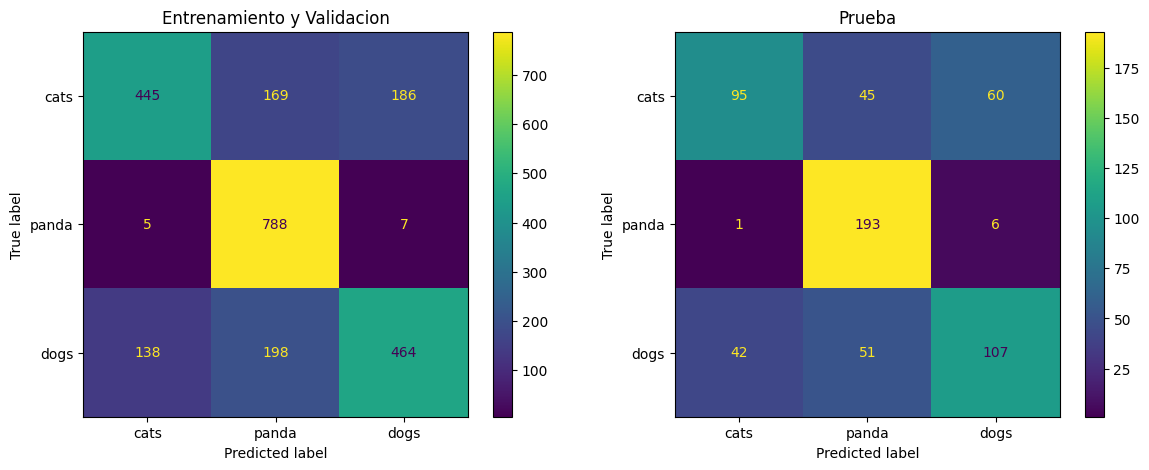

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

print("\nENTRENAMIENTO Y VALIDACION:\n")

y_pred = np.argmax(modelo.predict(X_train), axis=1)

print(classification_report(y_train, y_pred))
ConfusionMatrixDisplay.from_predictions(
    y_true = y_train,
    y_pred = y_pred,
    display_labels = clases,
    ax = ax1
)
ax1.set_title("Entrenamiento y Validacion")

print("\nPRUEBA:\n")

y_pred = np.argmax(modelo.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test,
    y_pred = y_pred,
    display_labels = clases,
    ax = ax2
)
ax2.set_title("Prueba")

plt.show()